##Bagging:
- Also called 'Bootstrap Aggregation'.
- Random Forest is an bagging algorithm.
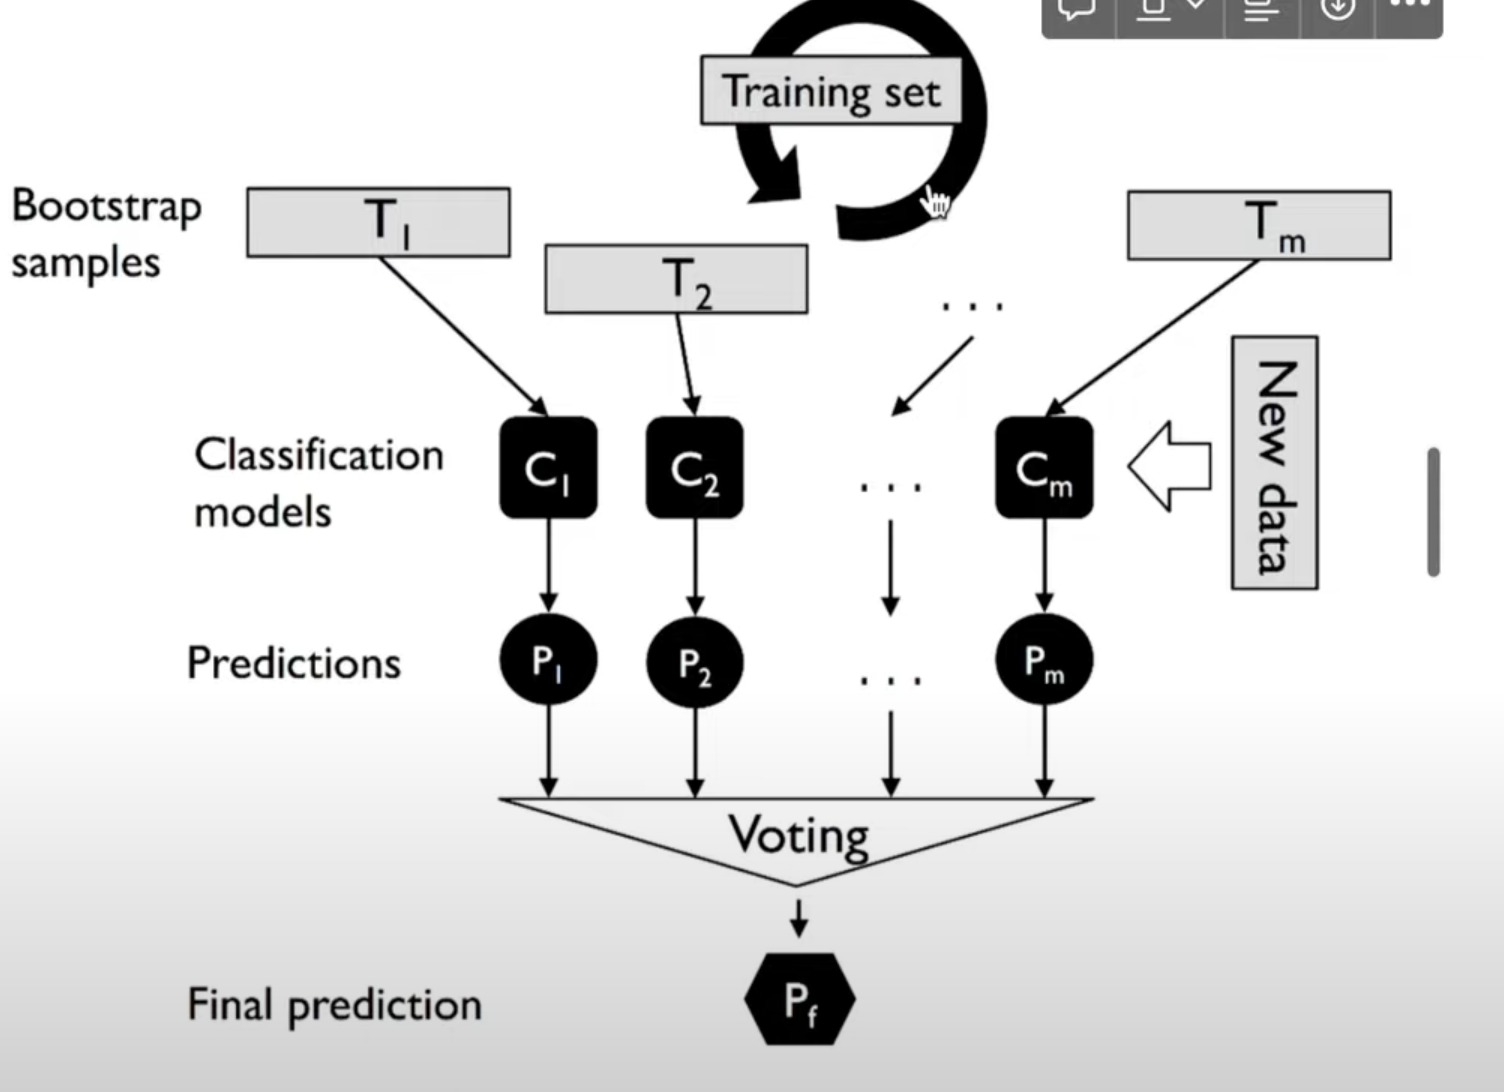

#### Loading Data:

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#load the data
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [40]:
df.shape

(918, 12)

In [41]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Preprocessing Data:

Z-score = (X- mean)/std

3:
- X = mean + 3 * std

In [42]:
#treating the ouliers using Z-score method

df[df.Cholesterol > (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [43]:
df1 = df[df.Cholesterol <= (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]
df1.shape

(915, 12)

In [44]:
df1[df1.Oldpeak > (df1.Oldpeak.mean() + 3 * df1.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [45]:
df2 = df1[df1.Oldpeak <= (df1.Oldpeak.mean() + 3 * df1.Oldpeak.std())]
df2.shape

(909, 12)

In [46]:
df2[df2.RestingBP > (df2.RestingBP.mean() + 3 * df2.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [47]:
df3 = df2[df2.RestingBP <= (df2.RestingBP.mean() + 3 * df2.RestingBP.std())]
df3.shape

(902, 12)

In [48]:
df3.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,53.487805,131.854767,197.347007,0.232816,136.848115,0.857428,0.548780
std,9.444115,17.682612,107.585613,0.422860,25.451226,1.013157,0.497891
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,4.000000,1.000000


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             902 non-null    int64  
 1   Sex             902 non-null    object 
 2   ChestPainType   902 non-null    object 
 3   RestingBP       902 non-null    int64  
 4   Cholesterol     902 non-null    int64  
 5   FastingBS       902 non-null    int64  
 6   RestingECG      902 non-null    object 
 7   MaxHR           902 non-null    int64  
 8   ExerciseAngina  902 non-null    object 
 9   Oldpeak         902 non-null    float64
 10  ST_Slope        902 non-null    object 
 11  HeartDisease    902 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ KB


In [50]:
df3.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [51]:
df3.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [52]:
df3.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [53]:
df3.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

#### Text Data Preprocessing:

In [54]:
#handling text data with label encoding

df4 = df3.copy()

df4.ExerciseAngina.replace(
    {'N':0,
     'Y':1},
    inplace = True
)

df4.ST_Slope.replace(
    {'Up':3,
     'Flat':2,
     'Down':1},
    inplace = True
)

df4.RestingECG.replace(
    {'Normal':1,
     'ST':2,
     'LVH':3},
    inplace = True
)

df4.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [55]:
#handling text data with one hot encoding

df5 = pd.get_dummies(df4, drop_first = True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


#### Preparing data for the model:

In [56]:
#splitting feature and target data
X = df5.drop('HeartDisease', axis = 'columns')
y = df5.HeartDisease

In [57]:
#scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

#### Model Building (Standalone and Bagging):

In [ ]:
#splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3,
                                                    stratify = y,random_state = 42 )

In [58]:
X_train.shape

(631, 13)

In [59]:
X_test.shape

(271, 13)

In [60]:
#train standalone SVM model

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

scores = cross_val_score( SVC(), X_scaled, y, cv = 5)

scores

array([0.84530387, 0.83977901, 0.82222222, 0.80555556, 0.76666667])

In [61]:
scores.mean()

0.8159054634745242

In [63]:
#bagging with svm

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier( estimator = SVC(),
                                 n_estimators = 100,
                                  max_samples = 0.8,
                                  random_state = 0,
                                  oob_score = True)

scores_bagging = cross_val_score(bag_model, X_scaled, y, cv = 5)

scores_bagging


array([0.83977901, 0.83977901, 0.82777778, 0.81111111, 0.76111111])

In [64]:
scores_bagging.mean()

0.8159116022099446

In [65]:
#decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

scores_decision_tree = cross_val_score(DecisionTreeClassifier(), X_scaled, y,
                                       cv = 5)

scores_decision_tree.mean()

0.7271639042357274

In [66]:
#bagging with Decision Tree

bag_model_new = BaggingClassifier(estimator = DecisionTreeClassifier(),
                                            n_estimators = 100,
                                            max_samples = 0.8,
                                            oob_score = True,
                                            random_state = 0)

scores_bag = cross_val_score(bag_model_new, X_scaled, y, cv = 5)

scores_bag.mean()

0.7992633517495396

In [67]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

scores_rf = cross_val_score(RandomForestClassifier(), X_scaled, y,
                            cv=5)
scores_rf.mean()

0.8203683241252303

##Boosting:

- Boosting are the ensemble methods where each predictors learn from the errors of it's predecessors.
- In boosting, ensemble of predictors are trained sequentially, unlike bagging where they are trained in parallel.
- Works by correcting the previous misclassifications (learning by mistakes)

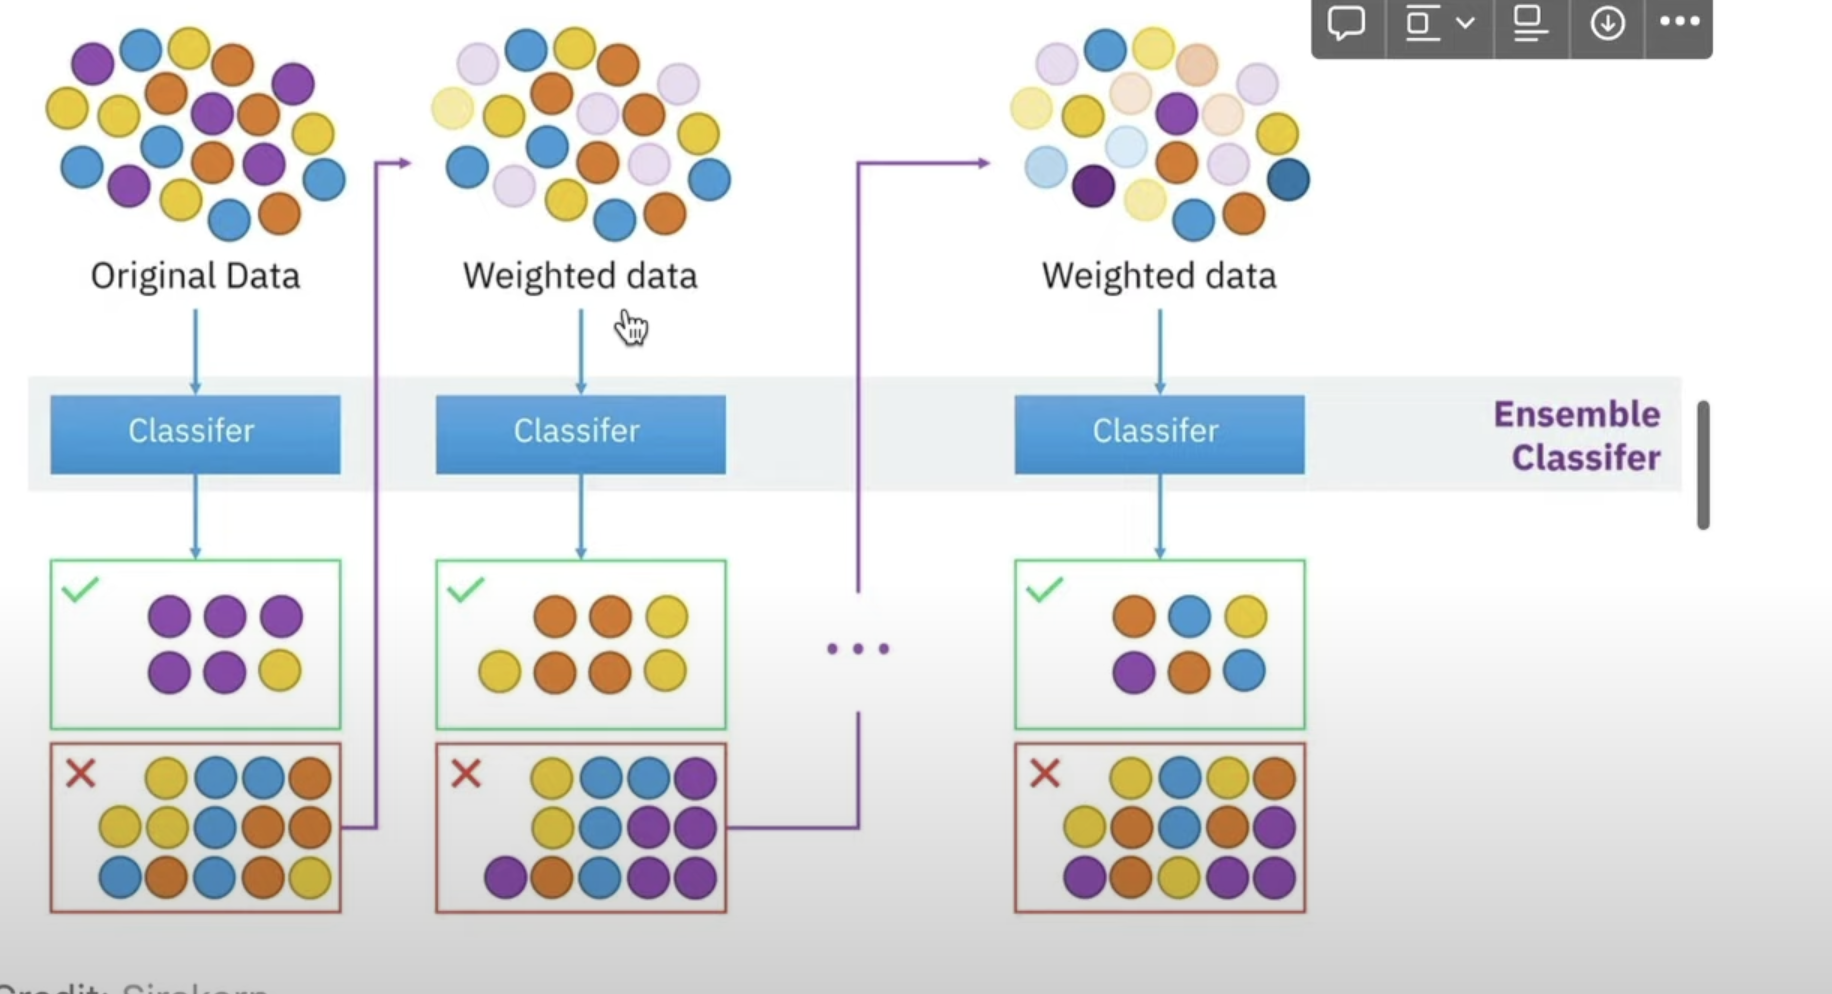


Types of Boosting:
1. AdaBoost
2. Gradient Boosting
3. XGBoost

####AdaBoost:
- also called 'Adaptive Boosting',
- Each predictor pays more attention to the instances wrongly predicted by it's predecessor by changing the weights of training instances,
- Each predictor is assigned coefficient of alpha, which depends on predictor's training error,
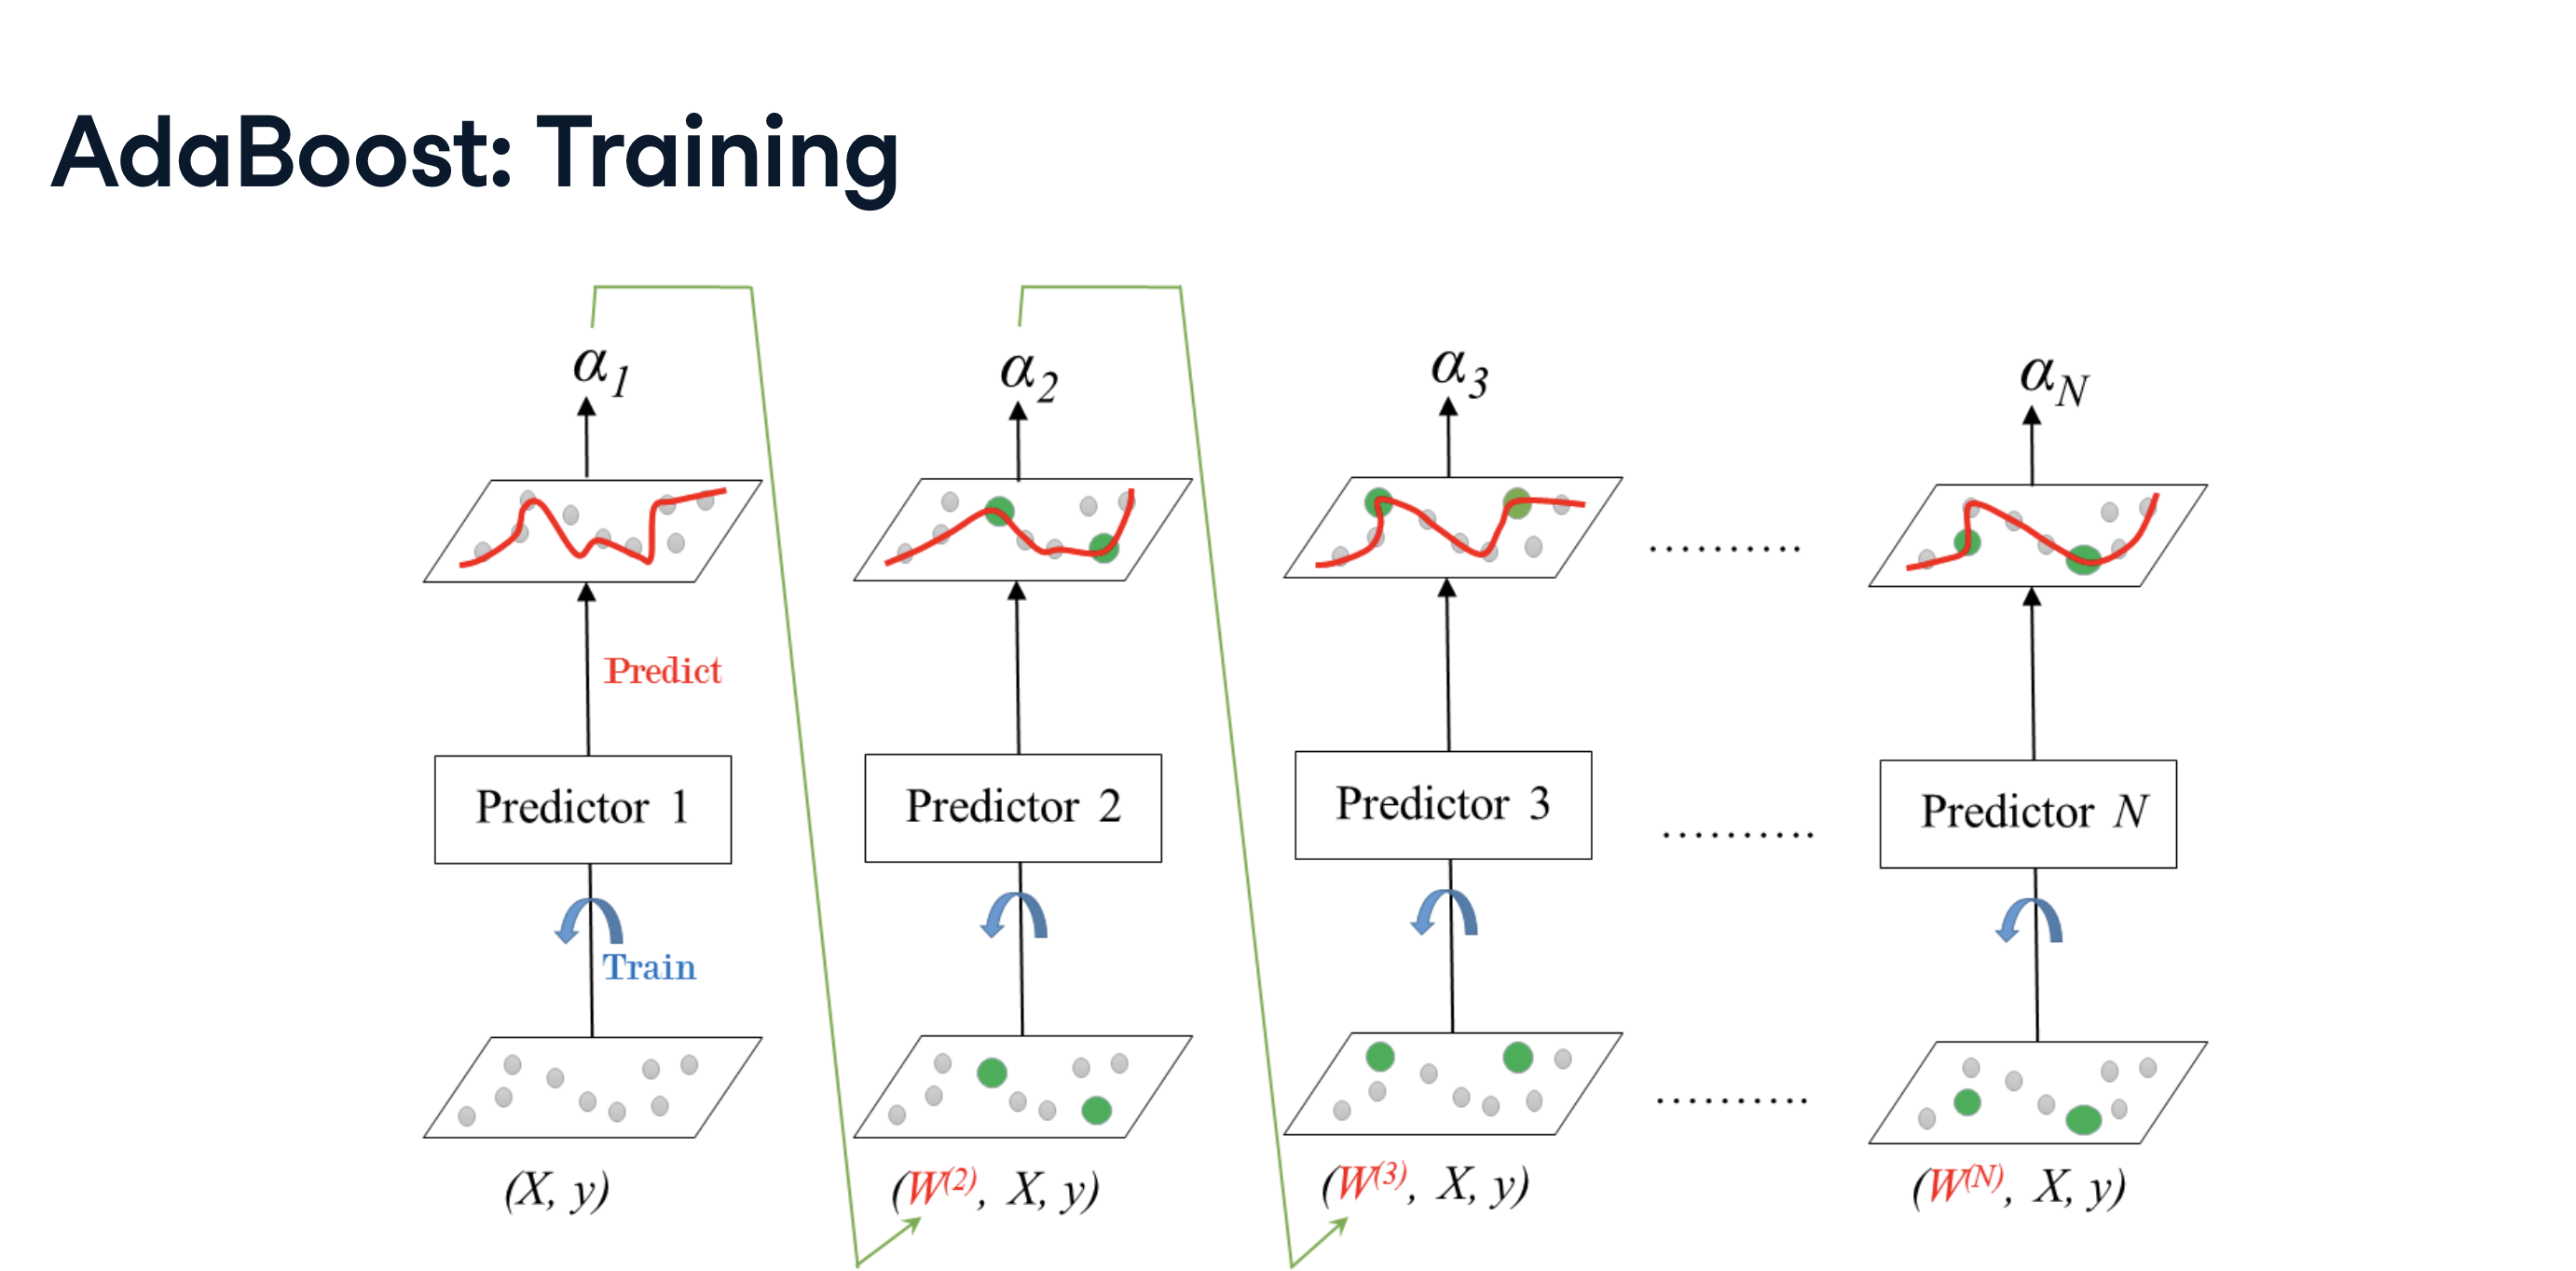

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

In [ ]:
#Intantiate Decision Tree

dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)

#Intantiate AdaBoost

ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 180,
                         random_state = 1)

In [ ]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

In [ ]:
ada.score(X_test,y_test)

#### Gradient Boosting: